In [217]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
from attention.utils.utilities import *
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DETECT FACES ON GROUP IMAGE (splittmng image for better detection)

### Loading image

In [591]:
image_name = "IMG_3288.jp2"
image_path = os.path.join(os.path.expanduser('~'), "Desktop", "IMG_3288.jp2")
image_path = '/Users/noah/Desktop/images_lewagon/LEFT_NJ_DISTANCE_NEW.jpg'

In [592]:
image = cv2_process(image_path)
# plt.imshow(image)

### Splitting in multiple crops

#### Defining number of crops along the axes

In [593]:
n_split_w = 12
n_split_h = 12

#### Cropping the image


In [594]:
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

### Generating bboxes and processing them 

#### Listing the bbox coordinates in the crops

In [595]:
# as per the crop coordinate system and the absolute coordinate system
bbox_crop_list = []
bbox_crop_list_absolute = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_absolute = reconstruct_coord(crop, coord_set)
    bbox_crop_list_absolute.append(coord_set_absolute)
bbox_crop_list_absolute

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 1529, 'x2': 1657, 'y1': 1682, 'y2': 1812}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

#### Drawing the bbox on each crop 


In [596]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

#### Eliminating duplicate bboxes

In [597]:
bbox_list = bbox_merge(bbox_crop_list_absolute)
bbox_list

[{'x1': 1529, 'x2': 1657, 'y1': 1682, 'y2': 1812}]

## Generating final image output

#### Drawing the unique bboxes on the original image 

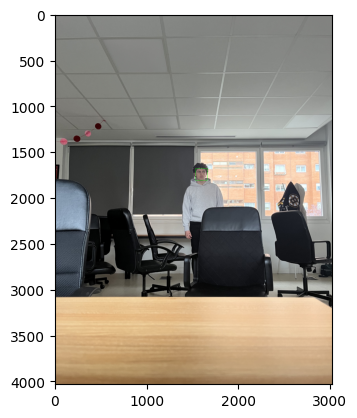

In [598]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

### Saving the image output

In [599]:
image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop")

cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

True

# DETECTING EYES AND IRIS ON FACES

### Generating faces

In [600]:
faces = crop_faces(image, bbox_list)
face = faces[0]
# plt.imshow(face)


### Generating eye and iris landmarks for one face

#### Running face mesh model on the face

In [601]:
mp_landmarks = find_landmarks(face)


#### Drawing the face mesh on the face

In [602]:
face_annotated = output_face_landmarks(face, mp_landmarks)
# plt.imshow(face_annotated)

#### Converting the Mediapipe landmark to a standard system of coordinates

In [603]:
landmark_list = convert_landmarks(face, mp_landmarks)
landmark_list

[(65, 87),
 (67, 70),
 (66, 75),
 (62, 54),
 (67, 65),
 (67, 59),
 (65, 44),
 (32, 43),
 (65, 34),
 (65, 28),
 (65, 5),
 (65, 89),
 (65, 91),
 (65, 92),
 (65, 94),
 (65, 95),
 (65, 98),
 (65, 101),
 (66, 107),
 (67, 72),
 (62, 72),
 (8, 26),
 (45, 46),
 (40, 47),
 (36, 47),
 (29, 44),
 (48, 45),
 (38, 33),
 (43, 34),
 (33, 34),
 (30, 36),
 (25, 47),
 (47, 116),
 (30, 41),
 (6, 47),
 (18, 44),
 (42, 67),
 (60, 86),
 (60, 91),
 (55, 88),
 (51, 91),
 (56, 92),
 (53, 93),
 (45, 99),
 (63, 70),
 (63, 65),
 (23, 33),
 (51, 55),
 (52, 69),
 (51, 67),
 (28, 67),
 (63, 59),
 (36, 28),
 (28, 30),
 (14, 17),
 (56, 33),
 (47, 36),
 (42, 95),
 (10, 94),
 (55, 72),
 (59, 73),
 (48, 96),
 (49, 96),
 (25, 27),
 (51, 71),
 (45, 29),
 (44, 26),
 (37, 7),
 (19, 22),
 (41, 16),
 (19, 30),
 (13, 29),
 (60, 89),
 (55, 90),
 (52, 92),
 (56, 72),
 (48, 96),
 (50, 96),
 (49, 95),
 (58, 70),
 (54, 93),
 (57, 93),
 (61, 92),
 (60, 107),
 (59, 100),
 (60, 98),
 (60, 95),
 (61, 94),
 (54, 94),
 (53, 95),
 (52, 96)

#### Defining the landmarks we want to focus on

In [604]:
# GLOBAL PARAMS: LANDMARK INDICES
LEFT_EYE_EDGES =[362, 263]
RIGHT_EYE_EDGES =[33, 133]

LEFT_IRIS_CONTOUR = [474, 475, 476, 477]
RIGHT_IRIS_CONTOUR = [469, 470, 471, 472]

LEFT_IRIS_CENTER = [473]
RIGHT_IRIS_CENTER = [468]

In [605]:
# Indices of the landmarks we focus on
landmark_idx = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

In [606]:
# Extracting the coordinates of the landmarks we focus on
landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
landmark_focus_x

[(76, 42), (96, 41), (89, 39), (30, 41), (50, 42), (43, 40)]

### Generating final image output

#### Drawing the points on the face image

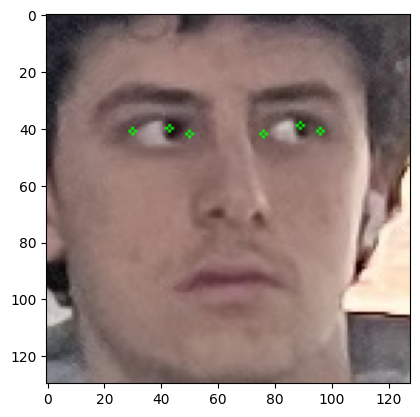

In [607]:
face_spec_lm = output_specific_landmarks(face, landmark_list, landmark_idx)
plt.imshow(face_spec_lm)

In [608]:
def left_detect_eye_direction(landmark_focus_x):
    # Calculate vector from left corner of left eye to right corner of left eye
    left_outside_x = landmark_focus_x[1][0]
    left_inside_corner_x= landmark_focus_x[0][0]
    left_eye_vector_x = left_outside_x - left_inside_corner_x 

    # Calculate position of left iris relative to left eye vector
    left_iris_x= landmark_focus_x[2][0]
    left_iris_vector_x = left_iris_x - left_inside_corner_x

    left_iris_position_relative_to_entire_eye = left_iris_vector_x / left_eye_vector_x

    if left_iris_position_relative_to_entire_eye < 0.63:
      return 'Looking straight'
    else:
      return 'Looking left'

left_detect_eye_direction(landmark_focus_x)


'Looking left'

In [609]:
def right_detect_eye_direction(landmark_focus_x):
    # Calculate vector from left corner of left eye to right corner of left eye
    right_inside_x = landmark_focus_x[4][0]
    right_outside_corner_x = landmark_focus_x[3][0]
    right_eye_vector_x = right_inside_x - right_outside_corner_x

    # Calculate position of right iris relative to right eye vector
    right_iris_x = landmark_focus_x[5][0]
    right_iris_vector_x = right_inside_x - right_iris_x
    
    right_iris_position_relative_to_entire_eye = right_iris_vector_x / right_eye_vector_x

    if right_iris_position_relative_to_entire_eye < 0.63:
      return 'Looking straight'
    else:
      return 'Looking right'
    
right_detect_eye_direction(landmark_focus_x)

'Looking straight'

In [610]:
def detect_attention(landmark_focus_x):
    left_eye = left_detect_eye_direction(landmark_focus_x)
    right_eye = right_detect_eye_direction(landmark_focus_x)

    if left_eye == right_eye:
        return 1  # attentive
    else:
        return 0  # inattentive
detect_attention(landmark_focus_x)

0

### FOR LOOP TO TEST PARAMS

In [ ]:
def process_image(image_paths):
    results = []
    
    for image_path in image_paths:
        attention_score = -1
        image = cv2_process(image_path)

        coord_set = detect_face(image)
        if coord_set:
            crops = crop_faces(image, coord_set)
            
            for crop in crops:
                mp_landmarks = find_landmarks(crop)

                if mp_landmarks:
                    landmark_list = convert_landmarks(crop, mp_landmarks)

                    LEFT_EYE_EDGES = [362, 263]
                    RIGHT_EYE_EDGES = [33, 133]

                    LEFT_IRIS_CENTER = [473]
                    RIGHT_IRIS_CENTER = [468]

                    landmark_idx = LEFT_EYE_EDGES + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

                    landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
                

                    attention_score = detect_attention(landmark_focus_x)

                    left_eye = left_detect_eye_direction(landmark_focus_x)
                    right_eye = right_detect_eye_direction(landmark_focus_x)

                    if left_eye is not None and right_eye is not None and left_eye == right_eye:
                        results.append((image_path, str(left_eye), str(right_eye), attention_score))
                    else:
                        results.append((image_path, str(left_eye), str(right_eye), attention_score))

    return results

In [ ]:
import os

directory_path = "/Users/noah/Desktop/images_lewagon/"

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    
    # Check if the file is an image file (you can add more extensions as needed)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        
        # Construct the full file path
        image_path = os.path.join(directory_path, filename)
        
        # Process the image and get the results
        results = process_image([image_path])
        
        # Do something with the results
        print(results)


[('/Users/noah/Desktop/images_lewagon/lancelotstraight.jpg', 'Looking straight', 'Looking straight', 1)]
[]
[('/Users/noah/Desktop/images_lewagon/straightgreg.jpg', 'Looking straight', 'Looking straight', 1)]
[]
[('/Users/noah/Desktop/images_lewagon/amineright.jpg', 'Looking straight', 'Looking right', 0)]
[('/Users/noah/Desktop/images_lewagon/rightjuliette.jpg', 'Looking straight', 'Looking right', 0)]
[('/Users/noah/Desktop/images_lewagon/rightcedric.jpg', 'Looking straight', 'Looking right', 0)]
[('/Users/noah/Desktop/images_lewagon/straightsara.jpg', 'Looking straight', 'Looking straight', 1)]
[('/Users/noah/Desktop/images_lewagon/leftcedric.jpg', 'Looking left', 'Looking straight', 0)]
[('/Users/noah/Desktop/images_lewagon/rightgreg.jpg', 'Looking straight', 'Looking right', 0)]
[('/Users/noah/Desktop/images_lewagon/straightjuliette.jpg', 'Looking straight', 'Looking straight', 1)]
[('/Users/noah/Desktop/images_lewagon/leftgreg.jpg', 'Looking left', 'Looking straight', 0)]
[('/Use

In [241]:
def test_iris(face: np.ndarray, face_landmarks: list[tuple], prediction_left: str, score_left: float, prediction_right: str, score_right: float):
    '''Takes a face image and returns a copy of the image with the drawing of the landmarks listed with (x, y) coordinates'''
    face_annotated = face.copy()
    (h,w) = face_annotated.shape[:2]
    expected_width = 500
    ratio = expected_width / w
    face_annotated = cv2.resize(face_annotated, (expected_width, int(h * ratio)))
    face_landmarks_resized = list((np.array(face_landmarks) * ratio).astype(int))
    #LEFT EYE PREDICTION
    landmark_idx_left = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER
    landmark_focus_left = [tuple(face_landmarks_resized[idx]) for idx in landmark_idx_left]
    for landmark in landmark_focus_left:
        cv2.circle(face_annotated, landmark, radius=3, color=(0, 255, 0), thickness=-1)
    cv2.putText(face_annotated, f'score: {score_left:.2f}',
                (landmark_focus_left[-1][0], landmark_focus_left[-1][1] + 40),
                fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    cv2.putText(face_annotated, f'{prediction_left}',
            (landmark_focus_left[-1][0], landmark_focus_left[-1][1] + 80),
            fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    #RIGHT EYE PREDICTION
    landmark_idx_right = RIGHT_EYE_EDGES  + RIGHT_IRIS_CENTER
    landmark_focus_right = [tuple(face_landmarks_resized[idx]) for idx in landmark_idx_right]
    for landmark in landmark_focus_right:
        cv2.circle(face_annotated, landmark, radius=3, color=(0, 255, 0), thickness=-1)
    cv2.putText(face_annotated, f'score: {score_right:.2f}',
                (landmark_focus_right[0][0], landmark_focus_right[0][1] + 40),
                fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    cv2.putText(face_annotated, f'{prediction_right}',
            (landmark_focus_right[0][0], landmark_focus_right[0][1] + 80),
            fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    return face_annotated

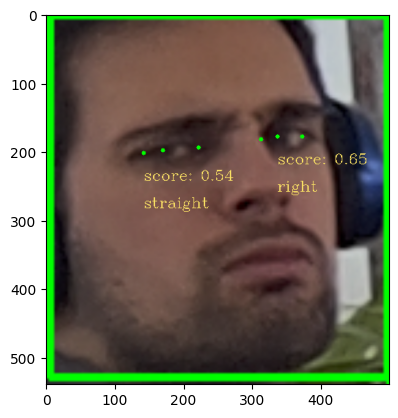

In [242]:
iris_result = test_iris(face, landmark_list, "right", 0.65, "straight", 0.54)
plt.imshow(iris_result)

### Saving the face image output

In [243]:
face_output_rgb = cv2.cvtColor(face_spec_lm, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop")
face_name = 'noah_lm.jpg'

cv2.imwrite(os.path.join(output_path, face_name), face_output_rgb)

True

In [244]:
image = cv2_process(image_path)


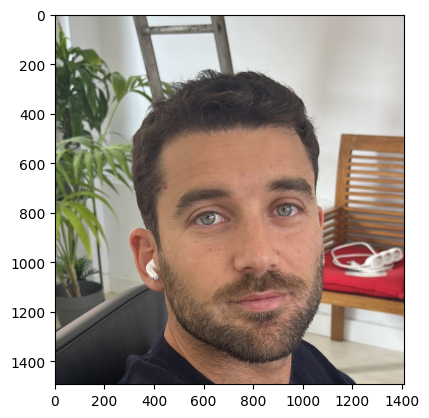

In [245]:
plt.imshow(image)